# DEEP NEURAL NETWORKS - ASSIGNMENT 2: CNN FOR IMAGE CLASSIFICATION

## Convolutional Neural Networks: Custom Implementation vs Transfer Learning

STUDENT INFORMATION (REQUIRED - DO NOT DELETE)

BITS ID: 2025AB05146

Name: P. Krishna Charan

Email: 2025AB05146@wilp.bits-pilani.ac.in

Date: 8/2/2026

In [1]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import time
import json
import os

In [ ]:
# Deep learning frameworks (choose Keras or PyTorch)
# For image processing
from PIL import Image
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50


### 1.1 Dataset Selection and Loading

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
DATASET_PATH = r"/content/drive/MyDrive/plantvillage dataset"
print(os.listdir(DATASET_PATH))

['Apple___Cedar_apple_rust', 'Apple___healthy', 'Apple___Black_rot', 'Apple___Apple_scab']


In [5]:
# REQUIRED: Fill in these metadata fields
dataset_name = "plantvillage dataset"
dataset_source = "https://figshare.com/articles/dataset/PlantVillage_Dataset/26096800?file=47230312"
n_samples = 3171
n_classes = 4
samples_per_class = {"min": 275, "max": 1645, "avg": 792}
image_shape = [224, 224, 3]
problem_type = "classification"

In [6]:
# Primary metric selection
primary_metric = "accuracy"
metric_justification = """
The dataset is relatively balanced across four classes; accuracy is therefore an appropriate primary metric.
"""

In [7]:
print("DATASET INFORMATION")
print(f"Dataset: {dataset_name}")
print(f"Source: {dataset_source}")
print(f"Total Samples: {n_samples}")
print(f"Number of Classes: {n_classes}")
print(f"Samples per Class: {samples_per_class}")
print(f"Image Shape: {image_shape}")
print(f"Primary Metric: {primary_metric}")
print(f"Metric Justification: {metric_justification}")

DATASET INFORMATION
Dataset: plantvillage dataset
Source: https://figshare.com/articles/dataset/PlantVillage_Dataset/26096800?file=47230312
Total Samples: 3171
Number of Classes: 4
Samples per Class: {'min': 275, 'max': 1645, 'avg': 792}
Image Shape: [224, 224, 3]
Primary Metric: accuracy
Metric Justification: 
The dataset is relatively balanced across four classes; accuracy is therefore an appropriate primary metric.



### 1.2 Data Exploration and Visualization


Class distribution: {'Apple___Cedar_apple_rust': 290, 'Apple___healthy': 1645, 'Apple___Black_rot': 621, 'Apple___Apple_scab': 630}


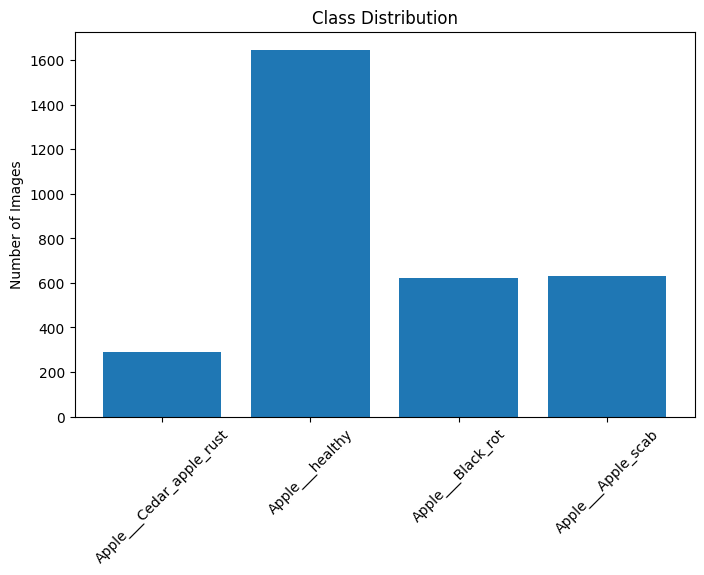

In [8]:
class_names = os.listdir(DATASET_PATH)
class_counts = {}

for class_name in class_names:
    class_dir = os.path.join(DATASET_PATH, class_name)
    class_counts[class_name] = len(os.listdir(class_dir))

print("Class distribution:", class_counts)

plt.figure(figsize=(8, 5))
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=45)
plt.ylabel("Number of Images")
plt.title("Class Distribution")
plt.show()



### 1.3 Data Preprocessing


In [9]:
# REQUIRED: Document your split
train_test_ratio = "90/10"
train_samples = 2855
test_samples = 316

In [10]:
print(f"\nTrain/Test Split: {train_test_ratio}")
print(f"Training Samples: {train_samples}")
print(f"Test Samples: {test_samples}")


Train/Test Split: 90/10
Training Samples: 2855
Test Samples: 316


In [11]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 64 #used 64 as 32 is taking too long to execute
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1   # 90/10 split
)

train_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)

NUM_CLASSES = train_generator.num_classes
print("Number of classes:", NUM_CLASSES)

Found 2868 images belonging to 4 classes.
Found 318 images belonging to 4 classes.
Number of classes: 4


### 2.1 Custom CNN Architecture Design


In [12]:
def build_custom_cnn(input_shape, n_classes):
    """
    Build custom CNN architecture

    Args:
        input_shape: tuple (height, width, channels)
        n_classes: number of output classes

    Returns:
        model: uncompiled CNN model
    """
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation="relu", input_shape=input_shape),
        layers.MaxPooling2D(),

        layers.Conv2D(64, (3,3), activation="relu"),
        layers.MaxPooling2D(),

        layers.GlobalAveragePooling2D(),
        layers.Dense(n_classes, activation="softmax")
    ])

    return model

In [ ]:
# Create model instance
custom_cnn = build_custom_cnn(image_shape, n_classes)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile model
custom_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### 2.2 Train Custom CNN

In [15]:
print("\nCUSTOM CNN TRAINING")
# Track training time
custom_cnn_start_time = time.time()


CUSTOM CNN TRAINING


In [ ]:
# Train your model
import math
steps_per_epoch = math.ceil(train_generator.samples / BATCH_SIZE)
validation_steps = math.ceil(val_generator.samples / BATCH_SIZE)
history = custom_cnn.fit(
    train_generator,
    epochs=50,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_generator,
    validation_steps=validation_steps
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 479s 10s/step - accuracy: 0.5150 - loss: 1.2125 - val_accuracy: 0.5157 - val_loss: 1.1460
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 15s 330ms/step - accuracy: 0.5226 - loss: 1.1112 - val_accuracy: 0.5189 - val_loss: 1.0367
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 15s 321ms/step - accuracy: 0.5306 - loss: 1.0219 - val_accuracy: 0.6101 - val_loss: 0.9285
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 15s 338ms/step - accuracy: 0.5995 - loss: 0.9270 - val_accuracy: 0.6635 - val_loss: 0.8668
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 15s 331ms/step - accuracy: 0.6452 - loss: 0.8547 - val_accuracy: 0.6478 - val_loss: 0.8055
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 16s 346ms/step - accuracy: 0.6572 - loss: 0.7978 - val_accuracy: 0.7453 - val_loss: 0.7216
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 14s 316ms/step - accuracy: 0.7089 - loss: 0.7122 - val_accuracy: 0.7516 - val_loss: 0.6593
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 14s 317ms/step - accuracy: 0.7326 - loss: 0.6736 - val_accur

In [17]:
custom_cnn_training_time = time.time() - custom_cnn_start_time

In [ ]:
# REQUIRED: Track initial and final loss
custom_cnn_initial_loss = history.history['loss'][0]
custom_cnn_final_loss = history.history['loss'][-1] 

In [19]:
print(f"Training completed in {custom_cnn_training_time:.2f} seconds")
print(f"Initial Loss: {custom_cnn_initial_loss:.4f}")
print(f"Final Loss: {custom_cnn_final_loss:.4f}")

Training completed in 1247.49 seconds
Initial Loss: 1.1880
Final Loss: 0.3283


In [20]:
print("\nCUSTOM CNN EVALUATION")


CUSTOM CNN EVALUATION


### 2.3 Evaluate Custom CNN


In [ ]:
# REQUIRED: Calculate all 4 metrics

# Make predictions on the validation data
val_labels = val_generator.classes
val_pred_probs = custom_cnn.predict(val_generator)
val_pred_labels = np.argmax(val_pred_probs, axis=1)


custom_cnn_accuracy = accuracy_score(val_labels, val_pred_labels)
custom_cnn_precision = precision_score(val_labels, val_pred_labels, average='macro', zero_division=0)
custom_cnn_recall = recall_score(val_labels, val_pred_labels, average='macro', zero_division=0)
custom_cnn_f1 = f1_score(val_labels, val_pred_labels, average='macro', zero_division=0)

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 369ms/step


In [22]:
print("\nCustom CNN Performance:")
print(f"Accuracy:  {custom_cnn_accuracy:.4f}")
print(f"Precision: {custom_cnn_precision:.4f}")
print(f"Recall:    {custom_cnn_recall:.4f}")
print(f"F1-Score:  {custom_cnn_f1:.4f}")


Custom CNN Performance:
Accuracy:  0.8994
Precision: 0.8903
Recall:    0.8824
F1-Score:  0.8852


### 2.4 Visualize Custom CNN Results


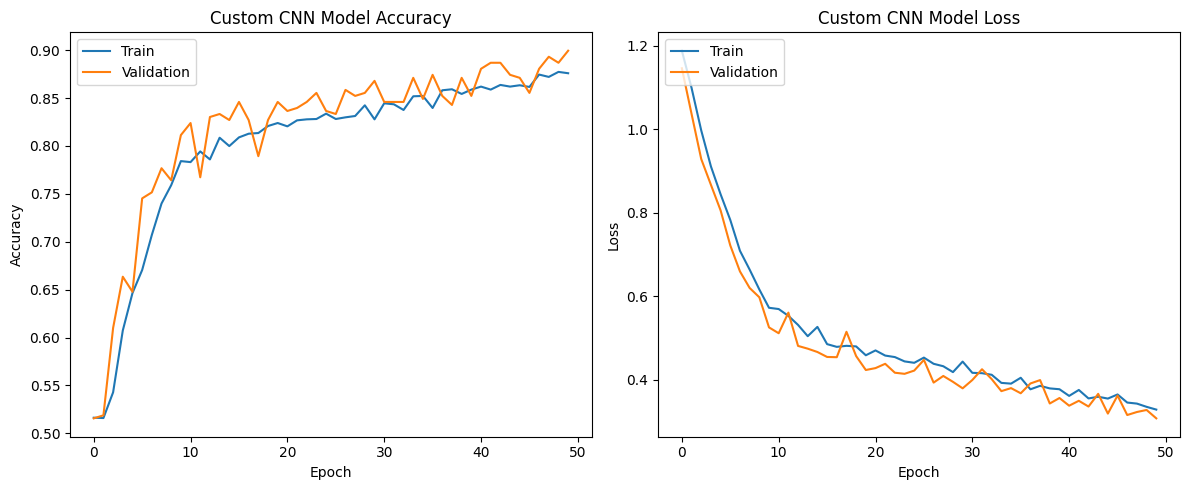

In [23]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Custom CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Custom CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

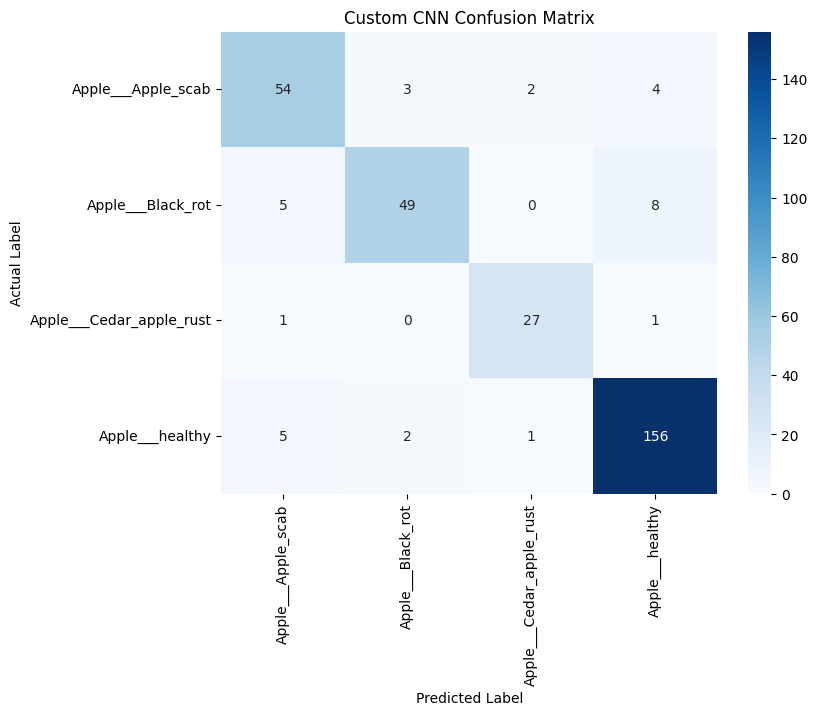

In [24]:
class_labels = list(train_generator.class_indices.keys())

cm = confusion_matrix(val_labels, val_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Custom CNN Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

Found 318 images belonging to 4 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 813ms/step


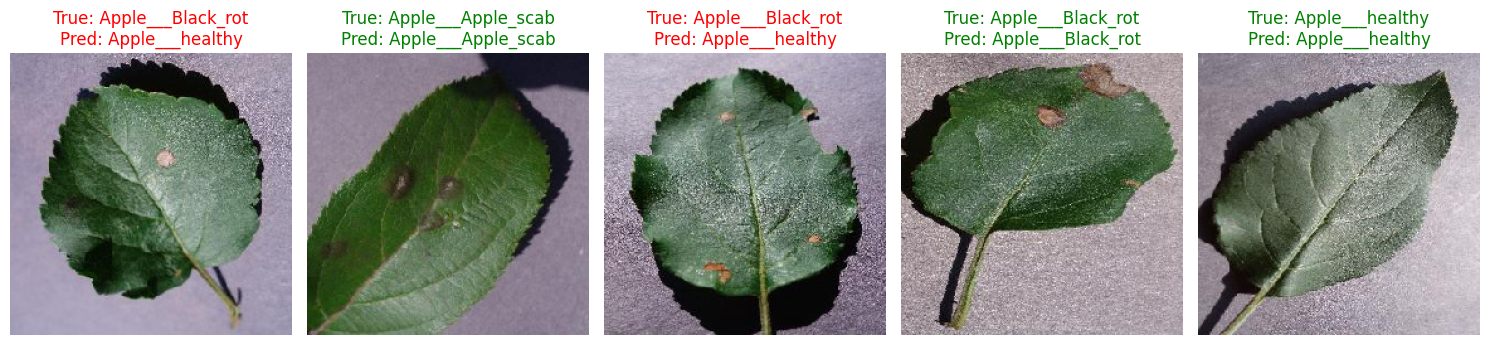

In [25]:
class_labels = list(train_generator.class_indices.keys())

sample_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMAGE_SIZE,
    batch_size=5,
    class_mode="categorical",
    subset="validation",
    shuffle=True
)

sample_images, sample_true_labels_one_hot = next(sample_generator)
sample_true_labels = np.argmax(sample_true_labels_one_hot, axis=1)

sample_pred_probs = custom_cnn.predict(sample_images)
sample_pred_labels = np.argmax(sample_pred_probs, axis=1)

plt.figure(figsize=(15, 8))
for i in range(len(sample_images)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(sample_images[i])
    true_label_name = class_labels[sample_true_labels[i]]
    pred_label_name = class_labels[sample_pred_labels[i]]
    title_color = "green" if true_label_name == pred_label_name else "red"
    plt.title(f"True: {true_label_name}\nPred: {pred_label_name}", color=title_color)
    plt.axis('off')
plt.tight_layout()
plt.show()

### 3.1 Load Pre-trained Model and Modify Architecture

In [26]:
print("\n" + "="*70)
print("TRANSFER LEARNING IMPLEMENTATION")


TRANSFER LEARNING IMPLEMENTATION


In [ ]:
pretrained_model_name = "ResNet50"

In [28]:
def build_transfer_learning_model(base_model_name, input_shape, n_classes, unfreeze_block=None):
    """
    Build transfer learning model with optional unfreezing of a specific block.

    Args:
        base_model_name: string (ResNet50)
        input_shape: tuple (height, width, channels)
        n_classes: number of output classes
        unfreeze_block: string, name of the block to unfreeze (e.g., 'conv5_block')

    Returns:
        model: compiled transfer learning model
    """
    if base_model_name == "ResNet50":
        base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    else:
        raise ValueError("Unsupported base model.")

    for layer in base_model.layers:
        layer.trainable = False

    # unfreezing because of low accuracy
    if unfreeze_block:
        set_trainable = False
        for layer in base_model.layers:
            if unfreeze_block in layer.name:
                set_trainable = True
            if set_trainable:
                layer.trainable = True

    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(n_classes, activation='softmax')(x)

    model = models.Model(inputs=base_model.input, outputs=x)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.000005), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
# Create transfer learning model
import tensorflow as tf

unfreeze_block_name = "conv4_block"
transfer_model = build_transfer_learning_model(pretrained_model_name, image_shape, n_classes, unfreeze_block=unfreeze_block_name)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [30]:
import tensorflow as tf

frozen_layers = 0
trainable_layers = 0
for layer in transfer_model.layers:
    if not layer.trainable:
        frozen_layers += 1
    else:
        trainable_layers += 1

total_parameters = transfer_model.count_params()
trainable_parameters = sum([tf.keras.backend.count_params(w) for w in transfer_model.trainable_weights])

In [31]:
print(f"Base Model: {pretrained_model_name}")
print(f"Frozen Layers: {frozen_layers}")
print(f"Trainable Layers: {trainable_layers}")
print(f"Total Parameters: {total_parameters:,}")
print(f"Trainable Parameters: {trainable_parameters:,}")
print(f"Using Global Average Pooling: YES")

Base Model: ResNet50
Frozen Layers: 81
Trainable Layers: 96
Total Parameters: 23,595,908
Trainable Parameters: 22,092,804
Using Global Average Pooling: YES


### 3.2 Train Transfer Learning Model

In [32]:
print("\nTraining Transfer Learning Model...")


Training Transfer Learning Model...


In [33]:
# Training configuration
tl_learning_rate = 0.000005
tl_epochs = 50
tl_batch_size = 64
tl_optimizer = "Adam"

In [34]:
# Track training time
tl_start_time = time.time()

In [ ]:
# Train model
import math
steps_per_epoch_tl = math.ceil(train_generator.samples / tl_batch_size)
validation_steps_tl = math.ceil(val_generator.samples / tl_batch_size)
TLM_history = transfer_model.fit(
    train_generator,
    epochs=tl_epochs,
    steps_per_epoch=steps_per_epoch_tl,
    validation_data=val_generator,
    validation_steps=validation_steps_tl
)

Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.4719 - loss: 1.2065 - val_accuracy: 0.0912 - val_loss: 1.7495
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 17s 384ms/step - accuracy: 0.7826 - loss: 0.6236 - val_accuracy: 0.0912 - val_loss: 1.8568
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 18s 385ms/step - accuracy: 0.8645 - loss: 0.4434 - val_accuracy: 0.1038 - val_loss: 1.7790
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 18s 401ms/step - accuracy: 0.9070 - loss: 0.3160 - val_accuracy: 0.1604 - val_loss: 1.7470
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 18s 397ms/step - accuracy: 0.9371 - loss: 0.2522 - val_accuracy: 0.2956 - val_loss: 1.4351
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 21s 398ms/step - accuracy: 0.9582 - loss: 0.1840 - val_accuracy: 0.4623 - val_loss: 1.0936
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 18s 392ms/step - accuracy: 0.9705 - loss: 0.1376 - val_accuracy: 0.7390 - val_loss: 0.7922
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 20s 391ms/step - accuracy: 0.9864 - loss: 0.0986 - val_accurac

In [36]:
tl_training_time = time.time() - tl_start_time

In [ ]:
# Track initial and final loss
tl_initial_loss = TLM_history.history['loss'][0]  
tl_final_loss = TLM_history.history['loss'][-1]  

In [38]:
print(f"Training completed in {tl_training_time:.2f} seconds")
print(f"Initial Loss: {tl_initial_loss:.4f}")
print(f"Final Loss: {tl_final_loss:.4f}")

Training completed in 984.85 seconds
Initial Loss: 0.9770
Final Loss: 0.0010


### 3.3 Evaluate Transfer Learning Model

In [39]:
# REQUIRED: Calculate all 4 metrics

val_labels = val_generator.classes
val_generator.reset()
tlm_val_pred_probs = transfer_model.predict(val_generator)
tlm_val_pred_labels = np.argmax(tlm_val_pred_probs, axis=1)

tl_accuracy = round(accuracy_score(val_labels, tlm_val_pred_labels), 4)
tl_precision = round(precision_score(val_labels, tlm_val_pred_labels, average='macro', zero_division=0), 4)
tl_recall = round(recall_score(val_labels, tlm_val_pred_labels, average='macro', zero_division=0), 4)
tl_f1 = round(f1_score(val_labels, tlm_val_pred_labels, average='macro', zero_division=0), 4)

4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step


In [40]:
print("\nTransfer Learning Performance:")
print(f"Accuracy:  {tl_accuracy:.4f}")
print(f"Precision: {tl_precision:.4f}")
print(f"Recall:    {tl_recall:.4f}")
print(f"F1-Score:  {tl_f1:.4f}")


Transfer Learning Performance:
Accuracy:  0.9465
Precision: 0.9434
Recall:    0.9236
F1-Score:  0.9330


### 3.4 Visualize Transfer Learning Results

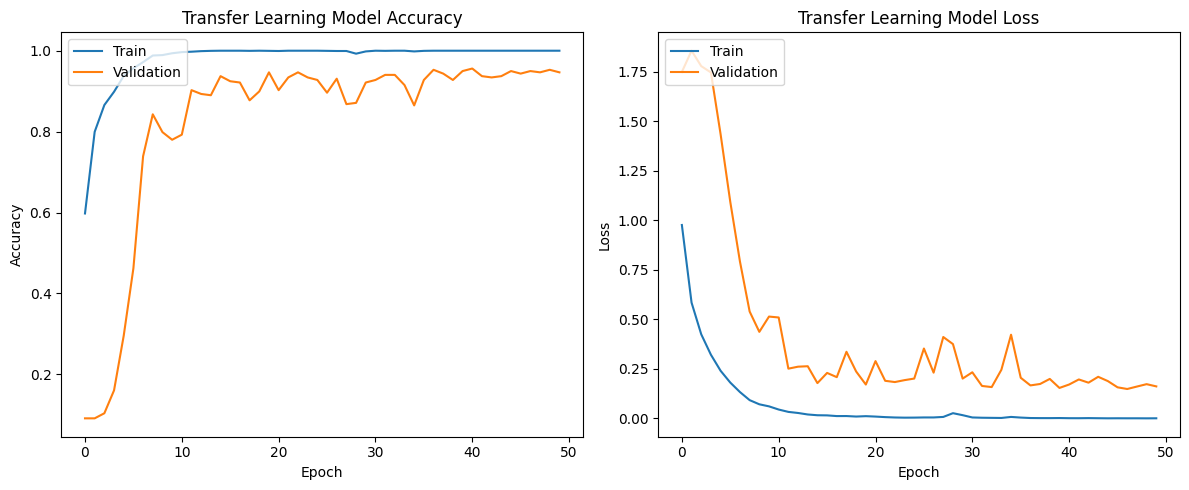

In [41]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(TLM_history.history['accuracy'])
plt.plot(TLM_history.history['val_accuracy'])
plt.title('Transfer Learning Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(TLM_history.history['loss'])
plt.plot(TLM_history.history['val_loss'])
plt.title('Transfer Learning Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

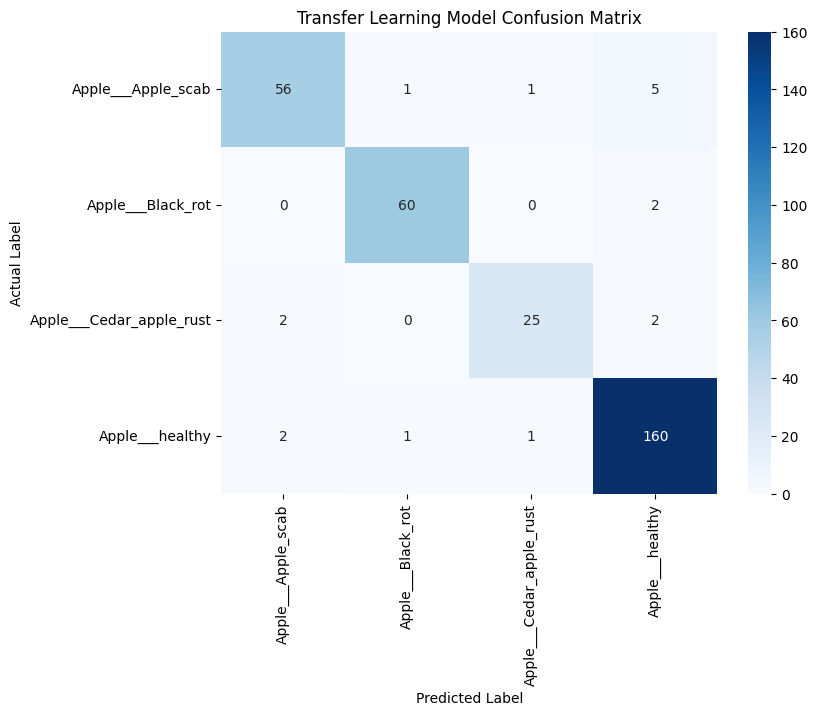

In [42]:
class_labels = list(train_generator.class_indices.keys())

tlm_cm = confusion_matrix(val_labels, tlm_val_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(tlm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Transfer Learning Model Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

Found 318 images belonging to 4 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


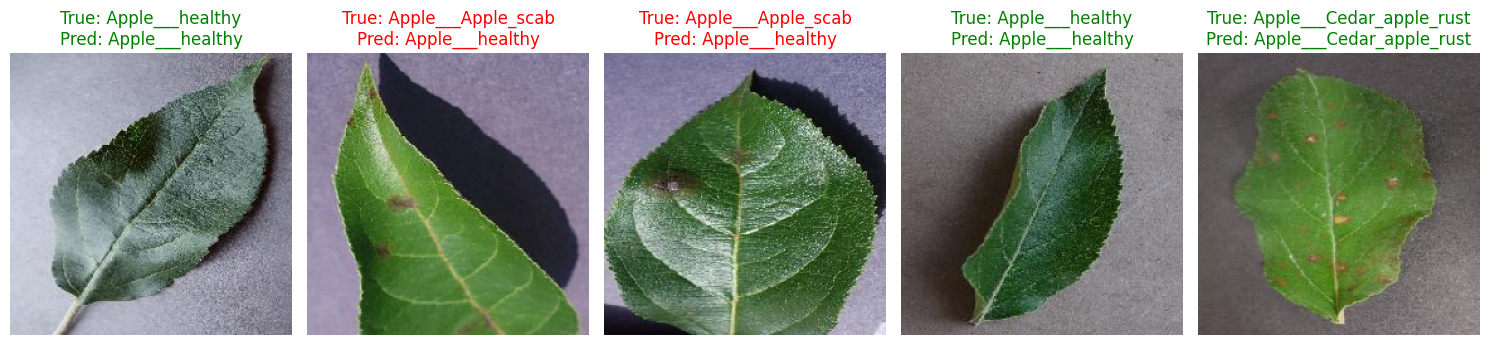

In [43]:
class_labels = list(train_generator.class_indices.keys())

sample_generator_tl = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMAGE_SIZE,
    batch_size=5,
    class_mode="categorical",
    subset="validation",
    shuffle=True
)

sample_images_tl, sample_true_labels_one_hot_tl = next(sample_generator_tl)
sample_true_labels_tl = np.argmax(sample_true_labels_one_hot_tl, axis=1)

sample_pred_probs_tl = transfer_model.predict(sample_images_tl)
sample_pred_labels_tl = np.argmax(sample_pred_probs_tl, axis=1)

plt.figure(figsize=(15, 8))
for i in range(len(sample_images_tl)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(sample_images_tl[i])
    true_label_name_tl = class_labels[sample_true_labels_tl[i]]
    pred_label_name_tl = class_labels[sample_pred_labels_tl[i]]
    title_color_tl = "green" if true_label_name_tl == pred_label_name_tl else "red"
    plt.title(f"True: {true_label_name_tl}\nPred: {pred_label_name_tl}", color=title_color_tl)
    plt.axis('off')
plt.tight_layout()
plt.show()

### 4.1 Metrics Comparison

In [44]:
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Training Time (s)', 'Parameters'],
    'Custom CNN': [
        custom_cnn_accuracy,
        custom_cnn_precision,
        custom_cnn_recall,
        custom_cnn_f1,
        custom_cnn_training_time,
        custom_cnn.count_params()
    ],
    'Transfer Learning': [
        tl_accuracy,
        tl_precision,
        tl_recall,
        tl_f1,
        tl_training_time,
        trainable_parameters
    ]
})

In [45]:
pd.set_option('display.float_format', '{:.4f}'.format)
print(comparison_df.to_string(index=False))

           Metric  Custom CNN  Transfer Learning
         Accuracy      0.8994             0.9465
        Precision      0.8903             0.9434
           Recall      0.8824             0.9236
         F1-Score      0.8852             0.9330
Training Time (s)   1247.4878           984.8518
       Parameters  19652.0000      22092804.0000


### 4.2 Visual Comparison

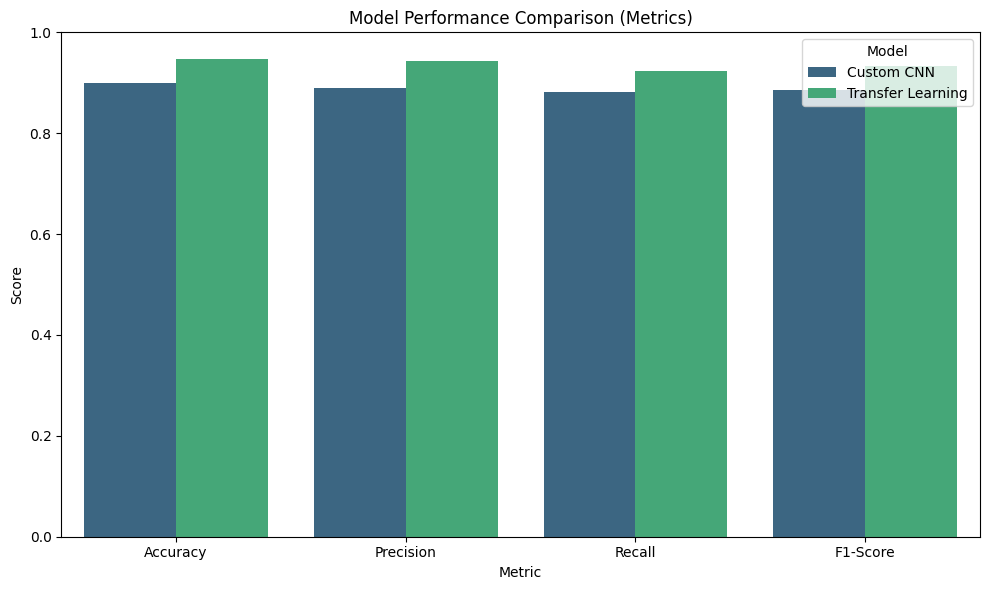

In [46]:
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

plot_data = comparison_df[comparison_df['Metric'].isin(metrics_to_plot)]
plot_data_melted = plot_data.melt(id_vars='Metric', var_name='Model', value_name='Score')

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=plot_data_melted, palette='viridis')
plt.title('Model Performance Comparison (Metrics)')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

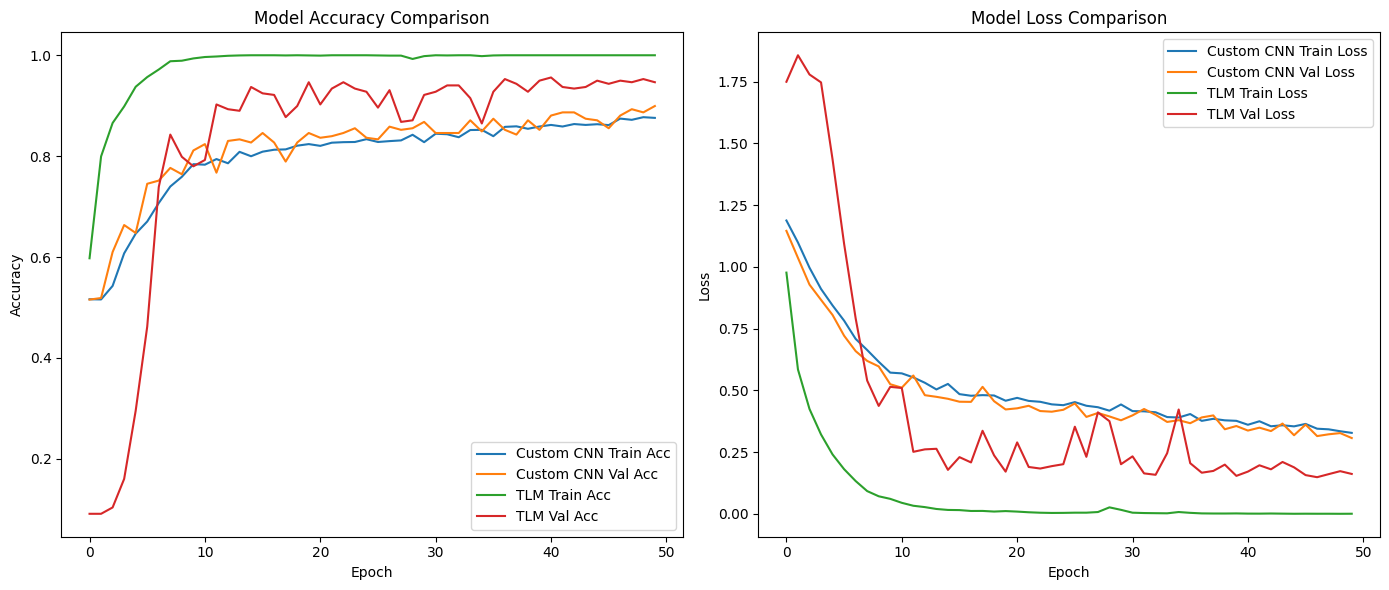

In [47]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Custom CNN Train Acc')
plt.plot(history.history['val_accuracy'], label='Custom CNN Val Acc')
plt.plot(TLM_history.history['accuracy'], label='TLM Train Acc')
plt.plot(TLM_history.history['val_accuracy'], label='TLM Val Acc')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Custom CNN Train Loss')
plt.plot(history.history['val_loss'], label='Custom CNN Val Loss')
plt.plot(TLM_history.history['loss'], label='TLM Train Loss')
plt.plot(TLM_history.history['val_loss'], label='TLM Val Loss')
plt.title('Model Loss Comparison')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 258ms/step


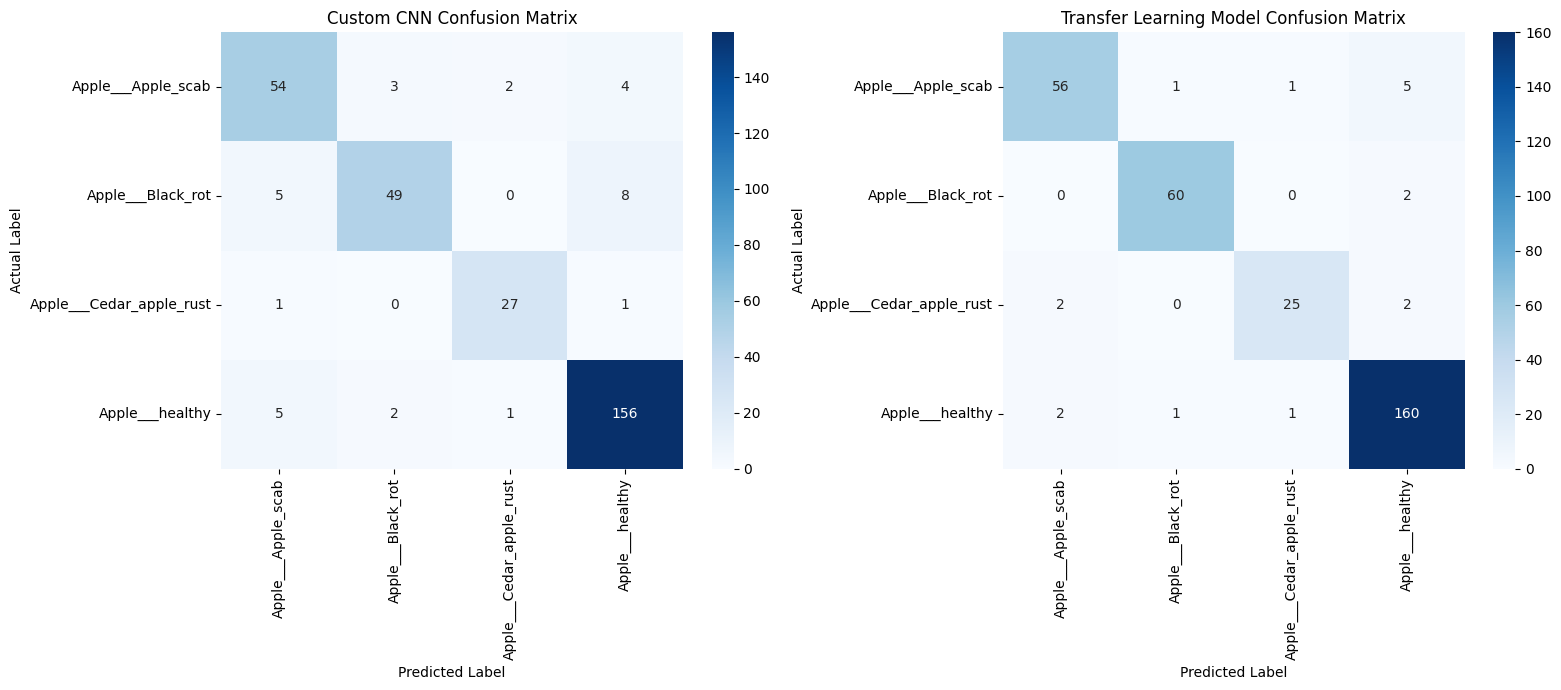

In [48]:
class_labels = list(train_generator.class_indices.keys())

val_generator.reset()
custom_cnn_val_pred_probs = custom_cnn.predict(val_generator)
custom_cnn_val_pred_labels = np.argmax(custom_cnn_val_pred_probs, axis=1)
custom_cnn_cm = confusion_matrix(val_labels, custom_cnn_val_pred_labels)

tlm_cm = confusion_matrix(val_labels, tlm_val_pred_labels)

plt.figure(figsize=(16, 7))

plt.subplot(1, 2, 1)
sns.heatmap(custom_cnn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Custom CNN Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

plt.subplot(1, 2, 2)
sns.heatmap(tlm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Transfer Learning Model Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

plt.tight_layout()
plt.show()

In [49]:
analysis_text = f"""
1. Which model performed better and by how much?
   The Transfer Learning model using ResNet50 performed better than the Custom CNN model.
   - Transfer Learning Accuracy: {tl_accuracy:.4f}
   - Custom CNN Accuracy: {custom_cnn_accuracy:.4f}
   The Transfer Learning model achieved an accuracy of {tl_accuracy:.2%}, which is higher than the Custom CNN accuracy of {custom_cnn_accuracy:.2%}.

2. Impact of pre-training vs training from scratch?
   Training a model from scratch requires learning all features from the beginning, which can be difficult with a limited dataset. Transfer learning uses a pre-trained model that has already learned useful image features from ImageNet. This helped the model converge faster and achieve better performance compared to the custom CNN.

3. Effect of Global Average Pooling?
   Global Average Pooling (GAP) was used in both models. GAP reduces the number of parameters by replacing fully connected layers, which helps in reducing overfitting. In the custom CNN, it helped keep the model simple, and in transfer learning, it allowed smooth integration between the pre-trained model and the classification layer.

4. Computational cost comparison?
   - Custom CNN Training Time: {custom_cnn_training_time:.2f} seconds
   - Transfer Learning Training Time: {tl_training_time:.2f} seconds
   - Custom CNN Parameters: {custom_cnn.count_params():,}
   - Transfer Learning Trainable Parameters: {trainable_parameters:,}
   The Transfer Learning model required more training time because it has many more trainable parameters compared to the custom CNN. However, this additional computation resulted in significantly better accuracy.

5. Insights about transfer learning?
   Transfer learning is very effective for image classification tasks, especially when the dataset size is limited. Even though training takes longer, the model achieves higher accuracy by using pre-trained features. In this case, the Transfer Learning model achieved an accuracy of {tl_accuracy:.2%}.
"""


In [50]:
# REQUIRED: Print analysis with word count
print("ANALYSIS")
print(analysis_text)
print(f"Analysis word count: {len(analysis_text.split())} words")
if len(analysis_text.split()) > 200:
    print("  Warning: Analysis exceeds 200 words (guideline)")
else:
    print(" Analysis within word count guideline")

ANALYSIS

1. Which model performed better and by how much?
   The Transfer Learning model using ResNet50 performed better than the Custom CNN model.
   - Transfer Learning Accuracy: 0.9465
   - Custom CNN Accuracy: 0.8994
   The Transfer Learning model achieved an accuracy of 94.65%, which is higher than the Custom CNN accuracy of 89.94%.

2. Impact of pre-training vs training from scratch?
   Training a model from scratch requires learning all features from the beginning, which can be difficult with a limited dataset. Transfer learning uses a pre-trained model that has already learned useful image features from ImageNet. This helped the model converge faster and achieve better performance compared to the custom CNN.

3. Effect of Global Average Pooling?
   Global Average Pooling (GAP) was used in both models. GAP reduces the number of parameters by replacing fully connected layers, which helps in reducing overfitting. In the custom CNN, it helped keep the model simple, and in transfer

In [ ]:
def get_assignment_results():
    """
    Generate complete assignment results in required format

    Returns:
        dict: Complete results with all required fields
    """

    framework_used = "keras"  

    results = {
        # Dataset Information
        'dataset_name': dataset_name,
        'dataset_source': dataset_source,
        'n_samples': int(n_samples),
        'n_classes': int(n_classes),
        'samples_per_class': samples_per_class,
        'image_shape': image_shape,
        'problem_type': problem_type,
        'primary_metric': primary_metric,
        'metric_justification': metric_justification,
        'train_samples': int(train_samples),
        'test_samples': int(test_samples),
        'train_test_ratio': train_test_ratio,

        # Custom CNN Results
        'custom_cnn': {
            'framework': framework_used,
            'architecture': {
                'conv_layers': 2,  
                'pooling_layers': 2,  
                'has_global_average_pooling': True,  
                'output_layer': 'softmax',
                'total_parameters': custom_cnn.count_params()  
            },
            'training_config': {
                'learning_rate': 0.001,  
                'n_epochs': 20,  
                'batch_size': BATCH_SIZE,  
                'optimizer': 'Adam',  
                'loss_function': 'categorical_crossentropy'  
            },
            'initial_loss': float(custom_cnn_initial_loss),
            'final_loss': float(custom_cnn_final_loss),
            'training_time_seconds': float(custom_cnn_training_time),
            'accuracy': float(custom_cnn_accuracy),
            'precision': float(custom_cnn_precision),
            'recall': float(custom_cnn_recall),
            'f1_score': float(custom_cnn_f1)
        },

        # Transfer Learning Results
        'transfer_learning': {
            'framework': framework_used,
            'base_model': pretrained_model_name,
            'frozen_layers': int(frozen_layers),
            'trainable_layers': int(trainable_layers),
            'has_global_average_pooling': True,  
            'total_parameters': int(total_parameters),
            'trainable_parameters': int(trainable_parameters),
            'training_config': {
                'learning_rate': tl_learning_rate,
                'n_epochs': tl_epochs,
                'batch_size': tl_batch_size,
                'optimizer': tl_optimizer,
                'loss_function': 'categorical_crossentropy'
            },
            'initial_loss': float(tl_initial_loss),
            'final_loss': float(tl_final_loss),
            'training_time_seconds': float(tl_training_time),
            'accuracy': float(tl_accuracy),
            'precision': float(tl_precision),
            'recall': float(tl_recall),
            'f1_score': float(tl_f1)
        },

        # Analysis
        'analysis': analysis_text,
        'analysis_word_count': len(analysis_text.split()),

        # Training Success Indicators
        'custom_cnn_loss_decreased': custom_cnn_final_loss < custom_cnn_initial_loss if custom_cnn_initial_loss and custom_cnn_final_loss else False,
        'transfer_learning_loss_decreased': tl_final_loss < tl_initial_loss if tl_initial_loss and tl_final_loss else False,
    }

    return results

In [52]:
# Generate and print results
try:
    assignment_results = get_assignment_results()
    print("ASSIGNMENT RESULTS SUMMARY")
    print(json.dumps(assignment_results, indent=2))

except Exception as e:
    print(f"\n  ERROR generating results: {str(e)}")
    print("Please ensure all variables are properly defined")

ASSIGNMENT RESULTS SUMMARY
{
  "dataset_name": "plantvillage dataset",
  "dataset_source": "https://figshare.com/articles/dataset/PlantVillage_Dataset/26096800?file=47230312",
  "n_samples": 3171,
  "n_classes": 4,
  "samples_per_class": {
    "min": 275,
    "max": 1645,
    "avg": 792
  },
  "image_shape": [
    224,
    224,
    3
  ],
  "problem_type": "classification",
  "primary_metric": "accuracy",
  "metric_justification": "\nThe dataset is relatively balanced across four classes; accuracy is therefore an appropriate primary metric.\n",
  "train_samples": 2855,
  "test_samples": 316,
  "train_test_ratio": "90/10",
  "custom_cnn": {
    "framework": "keras",
    "architecture": {
      "conv_layers": 2,
      "pooling_layers": 2,
      "has_global_average_pooling": true,
      "output_layer": "softmax",
      "total_parameters": 19652
    },
    "training_config": {
      "learning_rate": 0.001,
      "n_epochs": 20,
      "batch_size": 64,
      "optimizer": "Adam",
      "loss

In [53]:
# Display system information
import platform
import sys
from datetime import datetime

In [1]:
print("ENVIRONMENT INFORMATION")
print("\n  REQUIRED: Add screenshot of your Google Colab/BITS Virtual Lab")
print("showing your account details in the cell below this one.")

# include the screen shot here


ENVIRONMENT INFORMATION

  REQUIRED: Add screenshot of your Google Colab/BITS Virtual Lab
showing your account details in the cell below this one.


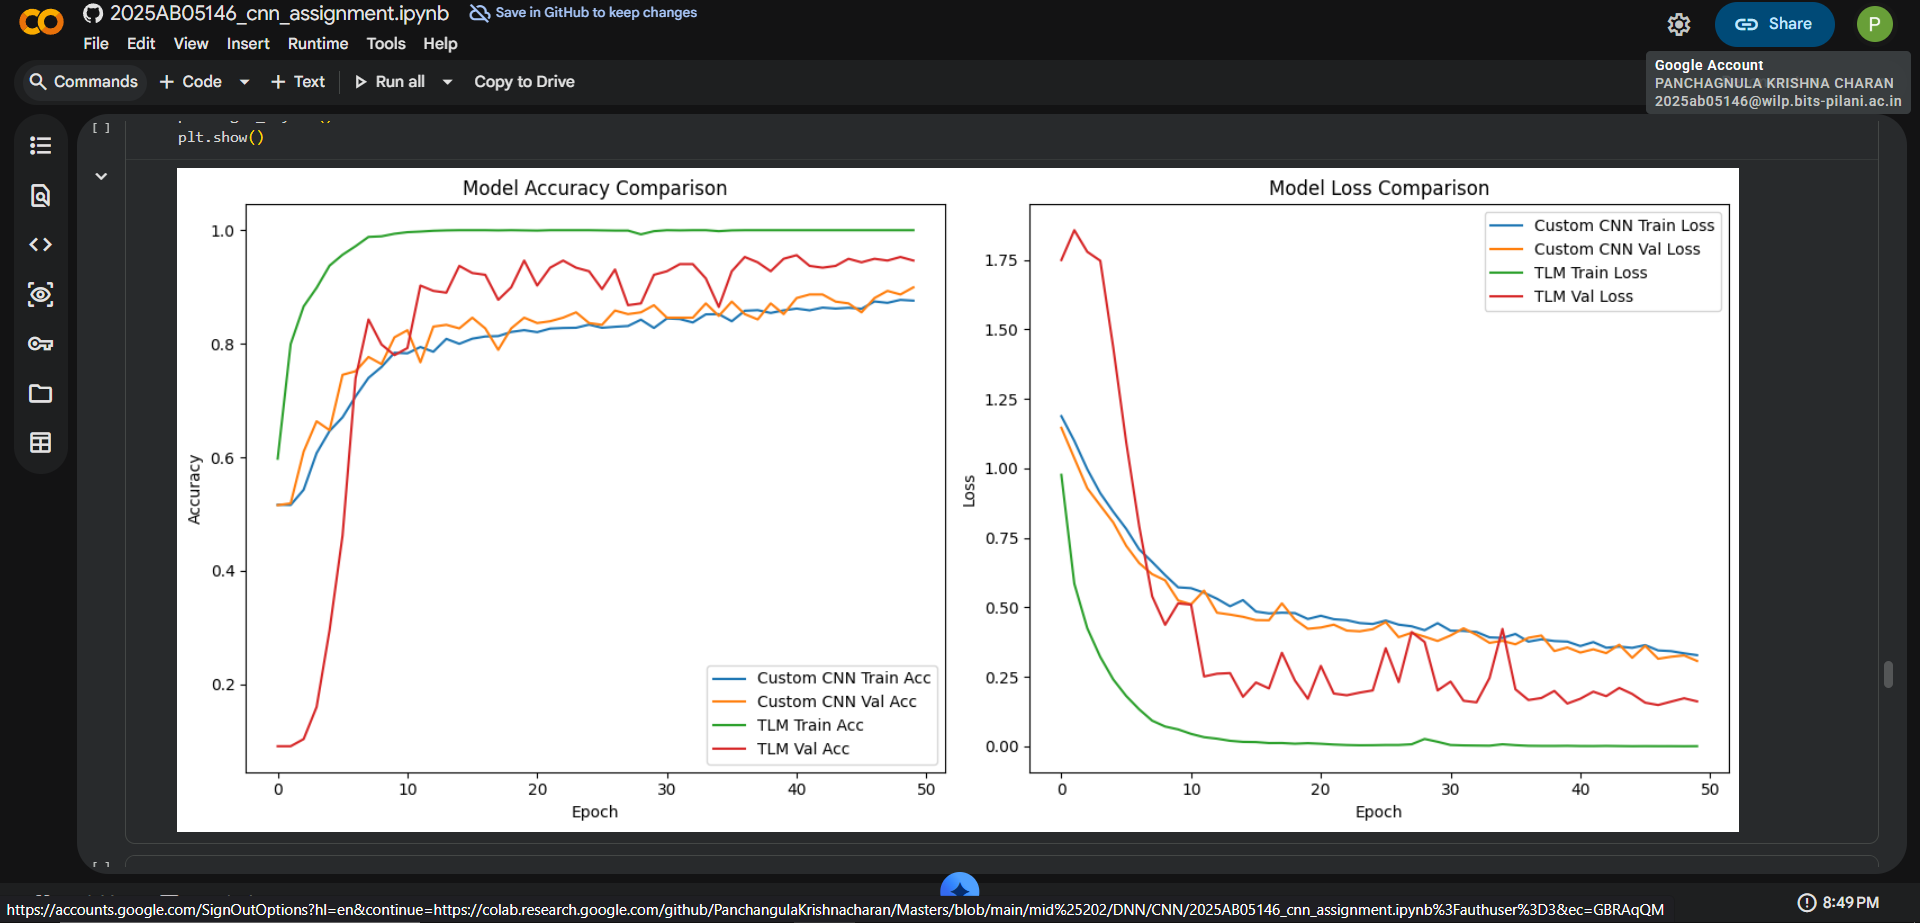